# Exercise 6 - Adam
### Task
Implement the Adam optimizer. For help refer to algorithm 2. A class structure is provided. After the implementation, compare the Adam optimizer with standard gradient descent 

### Learning goals
- Understand the Adam optimizer
- Experience the difference between Adam and standard gradient descent

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import copy

**define starting position and function to optimize**

Definimos um ponto inicial arbitrário para iniciar a descida do gradiente.  
A função de Rosenbrock é uma função de otimização, com um mínimo global em (𝑥1,𝑥2)=(1,1), mas com um vale curvo e estreito que dificulta a convergência para muitos otimizadores.

Calculamos manualmente o gradiente df/dx de f com relação a x1 e x2, necessário para ambos os métodos de otimização.

In [32]:
np.random.seed(100)  # Generate the data.
x1 = 2.
x2 = 2.
params0 = [np.array([x1]), np.array([x2])]

f = lambda x1, x2: 100 * (x2 - x1**2) ** 2 + (1 - x1) ** 2  # Rosenbrock 

dfdx = lambda x1, x2: [
    np.array(400 * (-x2 + x1**2) * x1 + 2 * (x1 - 1)),
    np.array(200 * (x2 - x1**2)),
]

**Adam optimizer** 

O algoritmo Adam combina o conceito de:

Momentum (m): média móvel dos gradientes.  
RMSProp (n): média móvel dos quadrados dos gradientes.

In [33]:
class AdamOptimizer:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None  # list to store all first statistical moments
        self.n = None  # list to store all second statistical moments
        self.t = 0  # keeps track of how many epochs have been performed

    def updateParams(self, params, grads):
        if self.m is None:
            self.m = [np.zeros_like(param) for param in params]  # initializing list
        if self.n is None:
            self.n = [np.zeros_like(param) for param in params]  # initializing list

        updatedParams = []

        self.t += 1  # exponent increases with epochs

        for p, g, m, n in zip(params, grads, self.m, self.n):
            m[:] = self.beta1 * m + (1 - self.beta1) * g
            n[:] = self.beta2 * n + (1 - self.beta2) * (g**2)

            mhat = m / (1 - self.beta1**self.t)
            nhat = n / (1 - self.beta2**self.t)

            updatedP = p - self.lr * mhat / (np.sqrt(nhat) + self.epsilon)
            updatedParams.append(updatedP)

        return updatedParams

**optimization with gradient descent**

Para cada época:

Calcula-se o custo (valor de f)  
Armazena-se o ponto atual  
Atualiza-se os parâmetros subtraindo lr * grad

In [34]:
lr = 1e-3
epochs = 1000

params = copy.deepcopy(params0)

optimizationPathGD = np.zeros((2, epochs))
for epoch in range(epochs):
    cost = f(params[0], params[1]).item()
    optimizationPathGD[0, epoch] = params[0]
    optimizationPathGD[1, epoch] = params[1]
    grad = dfdx(params[0], params[1])
    
    params[0] -= lr * grad[0]
    params[1] -= lr * grad[1]
    
    if epoch % 100 == 0:
        string = "Epoch: {}/{}\t\tCost = {:.2e}"
        print(string.format(epoch, epochs, cost))

Epoch: 0/1000		Cost = 4.01e+02
Epoch: 100/1000		Cost = 7.26e-02
Epoch: 200/1000		Cost = 6.88e-02
Epoch: 300/1000		Cost = 6.51e-02
Epoch: 400/1000		Cost = 6.16e-02
Epoch: 500/1000		Cost = 5.83e-02
Epoch: 600/1000		Cost = 5.51e-02
Epoch: 700/1000		Cost = 5.21e-02
Epoch: 800/1000		Cost = 4.92e-02
Epoch: 900/1000		Cost = 4.65e-02


/tmp/ipykernel_7480/1953630139.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  optimizationPathGD[0, epoch] = params[0]
/tmp/ipykernel_7480/1953630139.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  optimizationPathGD[1, epoch] = params[1]


**optimization with Adam**

Reiniciamos os parâmetros e aplicamos o Adam Optimizer. Armazenamos os pontos visitados para comparar o caminho da otimização.

In [35]:
lr = 5e-1
epochs = 1000
optimizer = AdamOptimizer(lr=lr)

params = copy.deepcopy(params0)

optimizationPathAdam = np.zeros((2, epochs))
for epoch in range(epochs):
    cost = f(params[0], params[1]).item()
    optimizationPathAdam[0, epoch] = params[0]
    optimizationPathAdam[1, epoch] = params[1]
    grad = dfdx(params[0], params[1])

    params = optimizer.updateParams(params, grad)

    if epoch % 100 == 0:
        string = "Epoch: {}/{}\t\tCost = {:.2e}"
        print(string.format(epoch, epochs, cost))

Epoch: 0/1000		Cost = 4.01e+02
Epoch: 100/1000		Cost = 9.42e-03
Epoch: 200/1000		Cost = 8.99e-04
Epoch: 300/1000		Cost = 4.84e-04
Epoch: 400/1000		Cost = 2.29e-04
Epoch: 500/1000		Cost = 9.57e-05
Epoch: 600/1000		Cost = 3.55e-05
Epoch: 700/1000		Cost = 1.17e-05
Epoch: 800/1000		Cost = 3.42e-06
Epoch: 900/1000		Cost = 8.82e-07


/tmp/ipykernel_7480/2196932420.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  optimizationPathAdam[0, epoch] = params[0]
/tmp/ipykernel_7480/2196932420.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  optimizationPathAdam[1, epoch] = params[1]


**visualize the optimization path**

Visualizamos a função de Rosenbrock com colormap logarítmico, que destaca as variações sutis ao longo do vale.

- Traçamos os caminhos tomados por:
    - **Gradiente Descendente** (linhas e pontos pretos)
    - **Adam** (linhas e pontos vermelhos)
    - **Mínimo Global** (quadrado azul em (1, 1))


- **Gradiente Descendente** percorre o vale lentamente, com passos curtos devido ao pequeno lr.
- **Adam** consegue avançar rapidamente ao longo do vale, ajustando dinamicamente a taxa de aprendizado.
- O gráfico mostra que o Adam converge muito mais eficientemente para o mínimo global.

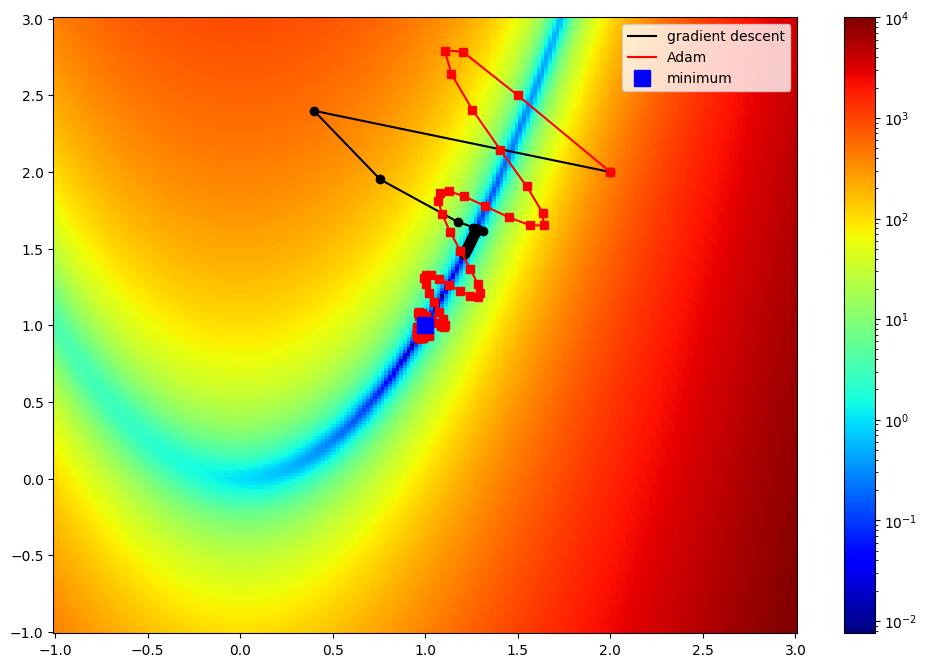

In [36]:
x1_ = np.linspace(-1, 3, 200)
x2_ = np.linspace(-1, 3, 200)
x1_, x2_ = np.meshgrid(x1_, x2_, indexing="ij")

fig, ax = plt.subplots(figsize=(12,8))
cp = ax.pcolormesh(x1_, x2_, f(x1_, x2_), cmap=plt.cm.jet, norm=colors.LogNorm(), shading='auto')
ax.plot(optimizationPathGD[0], optimizationPathGD[1], 'k', label="gradient descent")
ax.plot(optimizationPathGD[0], optimizationPathGD[1], 'ko')
ax.plot(optimizationPathAdam[0], optimizationPathAdam[1], "r", label="Adam")
ax.plot(optimizationPathAdam[0], optimizationPathAdam[1], "rs")
ax.plot([1], [1], "bs", markersize=12, label="minimum")

fig.colorbar(cp)
ax.legend()
plt.show()